In [ ]:
!pip install imbalanced-learn
!pip install tensorflow
!pip install scikit-learn
!pip show tensorflow
!pip install lime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as Xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.base import BaseEstimator, ClassifierMixin
from lime.lime_tabular import LimeTabularExplainer
import lime
import lime.lime_tabular

import shap
from sklearn.preprocessing import LabelEncoder

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tf_keras


In [ ]:
Alopecia_Dataset_1=pd.read_csv('/content/Dataset_1.csv')

In [ ]:
Alopecia_Dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Id                        999 non-null    int64 
 1   Genetics                  999 non-null    object
 2   Hormonal Changes          999 non-null    object
 3   Medical Conditions        999 non-null    object
 4   Medications & Treatments  999 non-null    object
 5   Nutritional Deficiencies  999 non-null    object
 6   Stress                    999 non-null    object
 7   Age                       999 non-null    int64 
 8   Poor Hair Care Habits     999 non-null    object
 9   Environmental Factors     999 non-null    object
 10  Smoking                   999 non-null    object
 11  Weight Loss               999 non-null    object
 12  Hair Loss                 999 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 101.6+ KB


In [ ]:
Alopecia_Dataset_1.shape

(999, 13)

In [ ]:
Alopecia_Dataset_1.isnull().sum()

,0
Id,0
Genetics,0
Hormonal Changes,0
Medical Conditions,0
Medications & Treatments,0
Nutritional Deficiencies,0
Stress,0
Age,0
Poor Hair Care Habits,0
Environmental Factors,0


In [ ]:
# Get data types of all columns
data_types = Alopecia_Dataset_1.dtypes

# Separate categorical and numerical features
categorical_features = data_types[data_types == 'object'].index.tolist()
numerical_features = data_types[data_types != 'object'].index.tolist()

# Print the names of categorical and numerical features
print("Categorical feature names:", categorical_features)
print("Numerical feature names:", numerical_features)


Categorical feature names: ['Genetics', 'Hormonal Changes', 'Medical Conditions', 'Medications & Treatments', 'Nutritional Deficiencies', 'Stress', 'Poor Hair Care Habits', 'Environmental Factors', 'Smoking', 'Weight Loss']
Numerical feature names: ['Id', 'Age', 'Hair Loss']


# **Encoding**

In [ ]:
Alopecia_Dataset_1['Genetics'].value_counts()

,count
Genetics,
Yes,522
No,477


In [ ]:
Alopecia_Dataset_1['Hormonal Changes'].value_counts()

,count
Hormonal Changes,
Yes,509
No,490


In [ ]:
Alopecia_Dataset_1['Medical Conditions'].value_counts()

,count
Medical Conditions,
No Data,110
Alopecia Areata,107
Psoriasis,100
Thyroid Problems,99
Androgenetic Alopecia,98
Dermatitis,92
Dermatosis,88
Seborrheic Dermatitis,88
Scalp Infection,79


In [ ]:
Alopecia_Dataset_1['Medications & Treatments'].value_counts()

,count
Medications & Treatments,
Rogaine,116
Antidepressants,110
Steroids,107
Heart Medication,104
Accutane,102
Antibiotics,94
Antifungal Cream,94
Chemotherapy,90
Blood Pressure Medication,90


In [ ]:
Alopecia_Dataset_1['Nutritional Deficiencies'].value_counts()

,count
Nutritional Deficiencies,
Zinc Deficiency,108
Vitamin D Deficiency,104
Biotin Deficiency,99
Vitamin A Deficiency,99
Omega-3 fatty acids,92
Protein deficiency,90
Magnesium deficiency,84
Vitamin E deficiency,83
Selenium deficiency,82


In [ ]:
Alopecia_Dataset_1['Stress'].value_counts()

,count
Stress,
Moderate,351
Low,327
High,321


In [ ]:
Alopecia_Dataset_1['Poor Hair Care Habits'].value_counts()

,count
Poor Hair Care Habits,
No,507
Yes,492


# **Target Encoding**

Simple integer encoding (0, 1, 2, 3...) assigns arbitrary numbers with no relation to the target feature, which can mislead models.
Target Encoding assigns values based on the actual relationship with the target (e.g., hair loss), making the feature predictive rather than just a number.
Reduces Overfitting (When Smoothed), Reduces Dimensionality (Efficient for Meta-Classifier).

In [ ]:
!pip install category_encoders # Install the category_encoders library
from category_encoders import TargetEncoder

# Target encoding for the 'Deficiency' column
encoder = TargetEncoder()

# Replace the original column with the encoded values
Alopecia_Dataset_1['Nutritional Deficiencies'] = encoder.fit_transform(
    Alopecia_Dataset_1['Nutritional Deficiencies'],
    Alopecia_Dataset_1['Hair Loss']
)

# Print the first few rows to check the result
print(Alopecia_Dataset_1[['Nutritional Deficiencies', 'Hair Loss']].head())


   Nutritional Deficiencies  Hair Loss
0                  0.547536          0
1                  0.547536          0
2                  0.522200          0
3                  0.464659          0
4                  0.512774          1


In [ ]:
!pip install category_encoders # Install the category_encoders library
from category_encoders import TargetEncoder

# Target encoding for the 'Deficiency' column
encoder = TargetEncoder()

# Replace the original column with the encoded values
Alopecia_Dataset_1['Medications & Treatments'] = encoder.fit_transform(
    Alopecia_Dataset_1['Medications & Treatments'],
    Alopecia_Dataset_1['Hair Loss']
)

# Print the first few rows to check the result
print(Alopecia_Dataset_1[['Medications & Treatments', 'Hair Loss']].head())


   Medications & Treatments  Hair Loss
0                  0.497852          0
1                  0.531894          0
2                  0.468103          0
3                  0.531894          0
4                  0.490198          1


In [ ]:
!pip install category_encoders # Install the category_encoders library
from category_encoders import TargetEncoder

# Target encoding for the 'Deficiency' column
encoder = TargetEncoder()

# Replace the original column with the encoded values
Alopecia_Dataset_1['Medical Conditions'] = encoder.fit_transform(
    Alopecia_Dataset_1['Medical Conditions'],
    Alopecia_Dataset_1['Hair Loss']
)

# Print the first few rows to check the result
print(Alopecia_Dataset_1[['Medical Conditions', 'Hair Loss']].head())

   Medical Conditions  Hair Loss
0            0.427281          0
1            0.478403          0
2            0.488646          0
3            0.478403          0
4            0.499999          1


In [ ]:
Alopecia_Dataset_1['Poor Hair Care Habits'].value_counts()

,count
Poor Hair Care Habits,
No,507
Yes,492


In [ ]:
Alopecia_Dataset_1['Environmental Factors'].value_counts()

,count
Environmental Factors,
Yes,508
No,491


In [ ]:
Alopecia_Dataset_1['Smoking'].value_counts()

,count
Smoking,
Yes,519
No,480


In [ ]:
Alopecia_Dataset_1['Weight Loss'].value_counts()

,count
Weight Loss,
No,527
Yes,472


In [ ]:
Alopecia_Dataset_1['Hair Loss'].value_counts()

,count
Hair Loss,
0,502
1,497


In [ ]:
Alopecia_Dataset_1.replace({"Genetics":{"No":0,"Yes":1},"Hormonal Changes":{"No":0,"Yes":1},"Poor Hair Care Habits":{"No":0,"Yes":1},"Smoking":{"No":0,"Yes":1},"Weight Loss":{"No":0,"Yes":1},"Environmental Factors":{"No":0,"Yes":1}},inplace=True)

<ipython-input-492-1114ea7a4a07>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Alopecia_Dataset_1.replace({"Genetics":{"No":0,"Yes":1},"Hormonal Changes":{"No":0,"Yes":1},"Poor Hair Care Habits":{"No":0,"Yes":1},"Smoking":{"No":0,"Yes":1},"Weight Loss":{"No":0,"Yes":1},"Environmental Factors":{"No":0,"Yes":1}},inplace=True)


In [ ]:
Alopecia_Dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        999 non-null    int64  
 1   Genetics                  999 non-null    int64  
 2   Hormonal Changes          999 non-null    int64  
 3   Medical Conditions        999 non-null    float64
 4   Medications & Treatments  999 non-null    float64
 5   Nutritional Deficiencies  999 non-null    float64
 6   Stress                    999 non-null    object 
 7   Age                       999 non-null    int64  
 8   Poor Hair Care Habits     999 non-null    int64  
 9   Environmental Factors     999 non-null    int64  
 10  Smoking                   999 non-null    int64  
 11  Weight Loss               999 non-null    int64  
 12  Hair Loss                 999 non-null    int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 101.6+ KB


# **Optimal Binarization via Decision Trees (Most Efficient)**

 Learns the best threshold for binary conversion using target labels. Decision Tree Classifier is for int values and Decision Tree Regressor.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Step 1: Fit a DecisionTreeClassifier to predict 'Hair Loss' based on 'Medical Conditions'
tree = DecisionTreeClassifier(max_depth=1)  # Shallow tree for binary thresholding
tree.fit(Alopecia_Dataset_1[['Medical Conditions']], Alopecia_Dataset_1['Hair Loss'])

# Step 2: Get the optimal threshold from the decision tree
threshold = tree.tree_.threshold[0]
print(f"Optimal Threshold: {threshold}")

# Step 3: Apply the threshold to 'Medical Conditions' to convert to binary in the same column
Alopecia_Dataset_1['Medical Conditions'] = (
    Alopecia_Dataset_1['Medical Conditions'] >= threshold
).astype(int)

# Verify the result
print(Alopecia_Dataset_1[['Medical Conditions', 'Hair Loss']].head())


Optimal Threshold: 0.5305987894535065
   Medical Conditions  Hair Loss
0                   0          0
1                   0          0
2                   0          0
3                   0          0
4                   0          1


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Step 1: Fit a DecisionTreeClassifier to predict 'Hair Loss' based on 'Medical Conditions'
tree = DecisionTreeClassifier(max_depth=1)  # Shallow tree for binary thresholding
tree.fit(Alopecia_Dataset_1[['Medications & Treatments']], Alopecia_Dataset_1['Hair Loss'])

# Step 2: Get the optimal threshold from the decision tree
threshold = tree.tree_.threshold[0]
print(f"Optimal Threshold: {threshold}")

# Step 3: Apply the threshold to 'Medical Conditions' to convert to binary in the same column
Alopecia_Dataset_1['Medications & Treatments'] = (
    Alopecia_Dataset_1['Medications & Treatments'] >= threshold
).astype(int)

# Verify the result
print(Alopecia_Dataset_1[['Medications & Treatments', 'Hair Loss']].head())


Optimal Threshold: 0.4940252751111984
   Medications & Treatments  Hair Loss
0                         1          0
1                         1          0
2                         0          0
3                         1          0
4                         0          1


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Step 1: Fit a DecisionTreeClassifier to predict 'Hair Loss' based on 'Medical Conditions'
tree = DecisionTreeClassifier(max_depth=1)  # Shallow tree for binary thresholding
tree.fit(Alopecia_Dataset_1[['Nutritional Deficiencies']], Alopecia_Dataset_1['Hair Loss'])

# Step 2: Get the optimal threshold from the decision tree
threshold = tree.tree_.threshold[0]
print(f"Optimal Threshold: {threshold}")

# Step 3: Apply the threshold to 'Medical Conditions' to convert to binary in the same column
Alopecia_Dataset_1['Nutritional Deficiencies'] = (
    Alopecia_Dataset_1['Nutritional Deficiencies'] >= threshold
).astype(int)

# Verify the result
print(Alopecia_Dataset_1[['Nutritional Deficiencies', 'Hair Loss']].head())


Optimal Threshold: 0.48611272871494293
   Nutritional Deficiencies  Hair Loss
0                         1          0
1                         1          0
2                         1          0
3                         0          0
4                         1          1


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Step 1: Fit a DecisionTreeClassifier to predict 'Hair Loss' based on 'Medical Conditions'
tree = DecisionTreeClassifier(max_depth=1)  # Shallow tree for binary thresholding
tree.fit(Alopecia_Dataset_1[['Age']], Alopecia_Dataset_1['Hair Loss'])

# Step 2: Get the optimal threshold from the decision tree
threshold = tree.tree_.threshold[0]
print(f"Optimal Threshold: {threshold}")

# Step 3: Apply the threshold to 'Medical Conditions' to convert to binary in the same column
Alopecia_Dataset_1['Age'] = (
    Alopecia_Dataset_1['Age'] >= threshold
).astype(int)

# Verify the result
print(Alopecia_Dataset_1[['Age', 'Hair Loss']].head())


Optimal Threshold: 49.5
   Age  Hair Loss
0    0          0
1    0          0
2    0          0
3    0          0
4    0          1


In [ ]:
Alopecia_Dataset_1.replace({"Stress":{"Low":0,"Moderate":1,"High":1}},inplace=True)

<ipython-input-498-890aa0c4f076>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Alopecia_Dataset_1.replace({"Stress":{"Low":0,"Moderate":1,"High":1}},inplace=True)


In [ ]:
Alopecia_Dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Id                        999 non-null    int64
 1   Genetics                  999 non-null    int64
 2   Hormonal Changes          999 non-null    int64
 3   Medical Conditions        999 non-null    int64
 4   Medications & Treatments  999 non-null    int64
 5   Nutritional Deficiencies  999 non-null    int64
 6   Stress                    999 non-null    int64
 7   Age                       999 non-null    int64
 8   Poor Hair Care Habits     999 non-null    int64
 9   Environmental Factors     999 non-null    int64
 10  Smoking                   999 non-null    int64
 11  Weight Loss               999 non-null    int64
 12  Hair Loss                 999 non-null    int64
dtypes: int64(13)
memory usage: 101.6 KB


In [ ]:
Alopecia_Dataset_1.head()

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,1,0,0,1,1,1,0,1,1,0,0,0
1,148393,0,0,0,1,1,1,0,1,1,0,0,0
2,155074,0,0,0,0,1,1,0,1,1,0,1,0
3,118261,1,1,0,1,0,1,0,1,1,0,0,0
4,111915,0,0,0,0,1,1,0,0,1,1,0,1


# **Pearson correlation coefficient**

                           Genetics  Hormonal Changes  Medical Conditions  \
Genetics                   1.000000          0.105127            0.026594   
Hormonal Changes           0.105127          1.000000           -0.116713   
Medical Conditions         0.026594         -0.116713            1.000000   
Medications & Treatments  -0.200556         -0.061129            0.026758   
Nutritional Deficiencies  -0.139371         -0.041101            0.056528   
Stress                    -0.040424         -0.070488           -0.074916   
Age                        0.053519         -0.036537           -0.041112   
Poor Hair Care Habits      0.000021          0.004061           -0.143549   
Environmental Factors     -0.147673          0.103118           -0.056415   
Smoking                    0.030099          0.056716           -0.185521   
Weight Loss               -0.001955         -0.086779            0.014478   
Hair Loss                  0.158130          0.021216            0.016292   

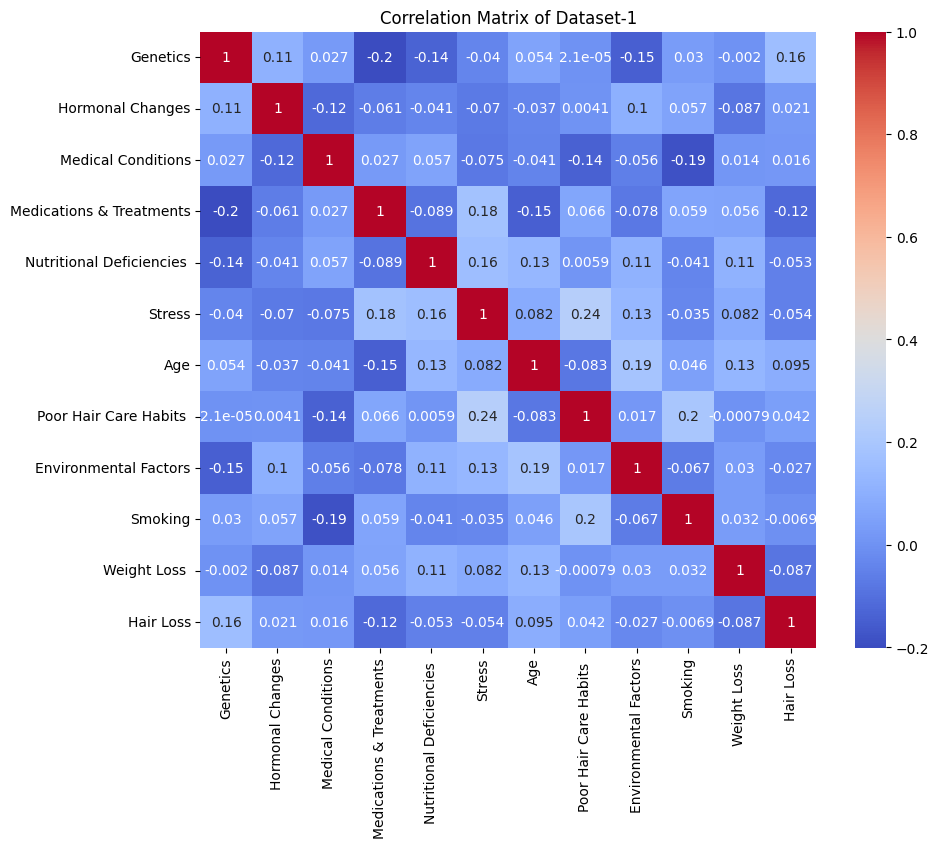

In [ ]:
np.random.seed(0)
data = np.random.rand(100, 12)
df = pd.DataFrame(data, columns=['Genetics', 'Hormonal Changes', 'Medical Conditions', 'Medications & Treatments', 'Nutritional Deficiencies ','Stress','Age','Poor Hair Care Habits ','Environmental Factors','Smoking','Weight Loss ','Hair Loss'])

# Calculate the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Dataset-1')
plt.show()

In [ ]:
Alopecia_Dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Id                        999 non-null    int64
 1   Genetics                  999 non-null    int64
 2   Hormonal Changes          999 non-null    int64
 3   Medical Conditions        999 non-null    int64
 4   Medications & Treatments  999 non-null    int64
 5   Nutritional Deficiencies  999 non-null    int64
 6   Stress                    999 non-null    int64
 7   Age                       999 non-null    int64
 8   Poor Hair Care Habits     999 non-null    int64
 9   Environmental Factors     999 non-null    int64
 10  Smoking                   999 non-null    int64
 11  Weight Loss               999 non-null    int64
 12  Hair Loss                 999 non-null    int64
dtypes: int64(13)
memory usage: 101.6 KB


In [ ]:
Alopecia_Dataset_1.drop(columns='Id', axis=1, inplace=True)

# **Splitting Dataset**

Threshold -0.6 to 0.6 to take correlated features from the correlation matrix and to drop the less important features.

In [ ]:
from sklearn.model_selection import train_test_split
X= Alopecia_Dataset_1[["Genetics","Age","Environmental Factors","Weight Loss"]]
Y= Alopecia_Dataset_1["Hair Loss"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(Y_train.value_counts())

Hair Loss
0    413
1    386
Name: count, dtype: int64


In [ ]:
from sklearn.utils import shuffle
target_size = 10000
current_size = X_train.shape[0]
augmentation_factor = target_size // current_size

numeric_cols = X_train.select_dtypes(include=[np.number]).columns
categorical_cols = X_train.select_dtypes(exclude=[np.number]).columns

numeric_data_list = []
categorical_data_list = []

# Original Augmentation Loop
for i in range(augmentation_factor):
    noise = np.random.normal(0, 0.01, X_train[numeric_cols].shape)
    X_numeric_augmented = X_train[numeric_cols] + noise
    numeric_data_list.append(X_numeric_augmented)

    X_categorical_augmented = X_train[categorical_cols]
    categorical_data_list.append(X_categorical_augmented)

X_numeric_combined = pd.concat(numeric_data_list, axis=0).reset_index(drop=True)
X_categorical_combined = pd.concat(categorical_data_list, axis=0).reset_index(drop=True)

X_train_combined = pd.concat([X_numeric_combined, X_categorical_combined], axis=1)
Y_train_combined = pd.concat([pd.Series(Y_train)] * augmentation_factor, axis=0).reset_index(drop=True)

n_remaining = target_size - len(X_train_combined)
if n_remaining > 0:
    X_remaining_numeric = X_train[numeric_cols].sample(n_remaining, replace=True).reset_index(drop=True)
    X_remaining_categorical = X_train[categorical_cols].sample(n_remaining, replace=True).reset_index(drop=True)
    X_remaining_combined = pd.concat([X_remaining_numeric, X_remaining_categorical], axis=1)

    X_train_combined = pd.concat([X_train_combined, X_remaining_combined], axis=0).reset_index(drop=True)
    Y_remaining = pd.Series(Y_train).sample(n_remaining, replace=True).reset_index(drop=True)
    Y_train_combined = pd.concat([Y_train_combined, Y_remaining], axis=0).reset_index(drop=True)

# ============= New Code for Balancing =============

# Count the classes
class_counts = Y_train_combined.value_counts()
min_class = class_counts.idxmin()
max_class = class_counts.idxmax()

# Separate classes
X_minority = X_train_combined[Y_train_combined == min_class]
X_majority = X_train_combined[Y_train_combined == max_class]

Y_minority = Y_train_combined[Y_train_combined == min_class]
Y_majority = Y_train_combined[Y_train_combined == max_class]

# Calculate difference to balance
difference = len(Y_majority) - len(Y_minority)

# Augment minority class to balance
X_minority_augmented = X_minority.sample(difference, replace=True).reset_index(drop=True)
Y_minority_augmented = pd.Series([min_class] * difference)

# Combine balanced dataset
X_train_balanced = pd.concat([X_majority, X_minority, X_minority_augmented], axis=0).reset_index(drop=True)
Y_train_balanced = pd.concat([Y_majority, Y_minority, Y_minority_augmented], axis=0).reset_index(drop=True)

# Shuffle the combined dataset
X_train_balanced, Y_train_balanced = shuffle(X_train_balanced, Y_train_balanced, random_state=42)

print("Balanced Class Distribution:")
print(Y_train_balanced.value_counts())

# Now train the model on X_train_balanced, Y_train_balanced

Balanced Class Distribution:
0    5180
1    5180
Name: count, dtype: int64


In [ ]:
print("Before Augmentation (Training):")
print(Y_train.value_counts(normalize=True) * 100)

print("\nAfter Augmentation (Training):")
print(Y_train_balanced.value_counts(normalize=True) * 100)

print("\nActual Test:")
print(Y_test.value_counts(normalize=True) * 100)

Before Augmentation (Training):
Hair Loss
0    51.689612
1    48.310388
Name: proportion, dtype: float64

After Augmentation (Training):
0    50.0
1    50.0
Name: proportion, dtype: float64

Actual Test:
Hair Loss
1    55.5
0    44.5
Name: proportion, dtype: float64


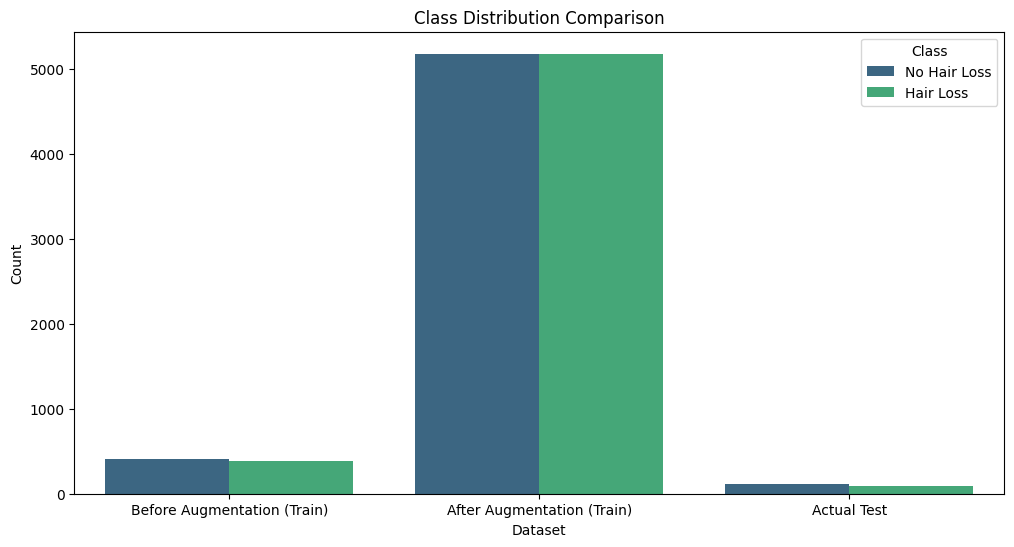

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create DataFrame for plotting
plot_data = pd.DataFrame({
    'Class': ['No Hair Loss', 'Hair Loss'],
    'Before Augmentation (Train)': Y_train.value_counts().values,
    'After Augmentation (Train)': Y_train_balanced.value_counts().values,
    'Actual Test': Y_test.value_counts().values
})

# Melt DataFrame for Seaborn compatibility
plot_data_melted = plot_data.melt(id_vars='Class', var_name='Dataset', value_name='Count')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=plot_data_melted, x='Dataset', y='Count', hue='Class', palette='viridis')
plt.title('Class Distribution Comparison')
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.legend(title='Class')
plt.show()

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)  # Fit & transform training data
X_test_scaled = scaler.transform(X_test)

# **Logistic Regression**

In [ ]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled, Y_train_balanced)  # Train the model

# Predictions on training data
X_train_prediction_log_reg = log_reg.predict(X_train_scaled)
train_accuracy_log_reg = accuracy_score(Y_train_balanced, X_train_prediction_log_reg)
print("Training data accuracy of Logistic Regression: ", train_accuracy_log_reg)

# Predictions on test data
X_test_prediction_log_reg = log_reg.predict(X_test_scaled)
test_accuracy_log_reg = accuracy_score(Y_test, X_test_prediction_log_reg)
print("Testing data accuracy of Logistic Regression: ", test_accuracy_log_reg)

Training data accuracy of Logistic Regression:  0.5493243243243243
Testing data accuracy of Logistic Regression:  0.565


# **Gaussian Naive Bayes**

In [ ]:
nbayes = GaussianNB()
nbayes.fit(X_train_scaled, Y_train_balanced)

X_train_prediction_nbayes=nbayes.predict(X_train_scaled)
train_accuracy_nbayes=accuracy_score(Y_train_balanced,X_train_prediction_nbayes)
print("Training data accuracy of nbayes: ",train_accuracy_nbayes)

X_test_prediction_nbayes=nbayes.predict(X_test_scaled)
test_accuracy_nbayes=accuracy_score(Y_test,X_test_prediction_nbayes)
print("Testing data accuracy of nbayes: ",test_accuracy_nbayes)

Training data accuracy of nbayes:  0.5127413127413127
Testing data accuracy of nbayes:  0.58


# **KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, Y_train_balanced)

X_train_prediction_knn=knn.predict(X_train_scaled)
train_accuracy_knn=accuracy_score(Y_train_balanced,X_train_prediction_knn)
print("Training data accuracy of knn: ",train_accuracy_knn)

X_test_prediction_knn=knn.predict(X_test_scaled)
test_accuracy_knn=accuracy_score(Y_test,X_test_prediction_knn)
print("Testing data accuracy of knn: ",test_accuracy_knn)

Training data accuracy of knn:  0.6416023166023166
Testing data accuracy of knn:  0.485


# **Decision Tree Classifier**


In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, Y_train_balanced)

X_train_prediction_dt_classifier=dt_classifier.predict(X_train_scaled)
train_accuracy_dt_classifier=accuracy_score(Y_train_balanced,X_train_prediction_dt_classifier)
print("Training data accuracy of dt_classifier: ",train_accuracy_dt_classifier)

X_test_prediction_dt_classifier=dt_classifier.predict(X_test_scaled)
test_accuracy_dt_classifier=accuracy_score(Y_test,X_test_prediction_dt_classifier)
print("Testing data accuracy of dt_classifier: ",test_accuracy_dt_classifier)

Training data accuracy of dt_classifier:  0.983011583011583
Testing data accuracy of dt_classifier:  0.465


# **Random Forest Classifier**

In [ ]:
random_forest = RandomForestClassifier(n_estimators=300)
random_forest.fit(X_train_scaled, Y_train_balanced)
X_train_prediction_random_forest=random_forest.predict(X_train_scaled)
train_accuracy_random_forest=accuracy_score(Y_train_balanced,X_train_prediction_random_forest)
print("Training data accuracy of random_forest: ",train_accuracy_random_forest)
X_test_prediction_random_forest=random_forest.predict(X_test_scaled)
test_accuracy_random_forest=accuracy_score(Y_test,X_test_prediction_random_forest)
print("Testing data accuracy of random_forest: ",test_accuracy_random_forest)

Training data accuracy of random_forest:  0.983011583011583
Testing data accuracy of random_forest:  0.48


# **XGB Classifer**

In [ ]:
xgb = Xgb.XGBClassifier()
xgb.fit(X_train_scaled, Y_train_balanced)
X_train_prediction_xgb=xgb.predict(X_train_scaled)
train_accuracy_xgb=accuracy_score(Y_train_balanced,X_train_prediction_xgb)
print("Training data accuracy of xgb: ",train_accuracy_xgb)
X_test_prediction_xgb=xgb.predict(X_test_scaled)
test_accuracy_xgb=accuracy_score(Y_test,X_test_prediction_xgb)
print("Testing data accuracy of xgb: ",test_accuracy_xgb)

Training data accuracy of xgb:  0.8494208494208494
Testing data accuracy of xgb:  0.48


# **Support Vector Classifer**

In [ ]:
svc = SVC()
svc.fit(X_train_scaled, Y_train_balanced)
X_train_prediction_svc=svc.predict(X_train_scaled)
train_accuracy_svc=accuracy_score(Y_train_balanced,X_train_prediction_svc)
print("Training data accuracy of xgb: ",train_accuracy_svc)

X_test_prediction_svc=svc.predict(X_test_scaled)
test_accuracy_svc=accuracy_score(Y_test,X_test_prediction_svc)
print("Testing data accuracy of svc: ",test_accuracy_svc)

Training data accuracy of xgb:  0.5646718146718147
Testing data accuracy of svc:  0.575


# **Meta Classifier Stacking**

In [ ]:
#predictions_xgb = xgb.predict(X_test_scaled)
predictions_svc =svc.predict(X_test_scaled)
predictions_log_reg = log_reg.predict(X_test_scaled)
predictions_rf = random_forest.predict(X_test_scaled)
predictions_knn = knn.predict(X_test_scaled)
predictions_nb = nbayes.predict(X_test_scaled)
predictions_dt = dt_classifier.predict(X_test_scaled)
predictions_xgb = xgb.predict(X_test_scaled)

# Combine predictions into a new DataFrame
predictions_df = pd.DataFrame({
    'xgb': predictions_xgb,
    'svc': predictions_svc,
    'log_reg': predictions_log_reg,
    'rf': predictions_rf,
    'knn': predictions_knn,
    'nb': predictions_nb,
    'dt': predictions_dt
})

# Step 2: Prepare the target variable
target = Y_test  # Use the actual target variable for the test set

# Step 3: Train a meta-classifier
meta_classifier =  Xgb.XGBClassifier()   # You can choose any classifier as the meta-classifier

# meta_classifier =  svc  # You can choose any classifier as the meta-classifier
meta_classifier.fit(predictions_df, target)

# Step 4: Make predictions with the meta-classifier
y_pred_meta = meta_classifier.predict(predictions_df)

# Step 5: Evaluate the performance of the meta-classifier
accuracy_meta = accuracy_score(target, y_pred_meta)
print("Accuracy of Meta Classifier:", accuracy_meta)

Accuracy of Meta Classifier: 0.585


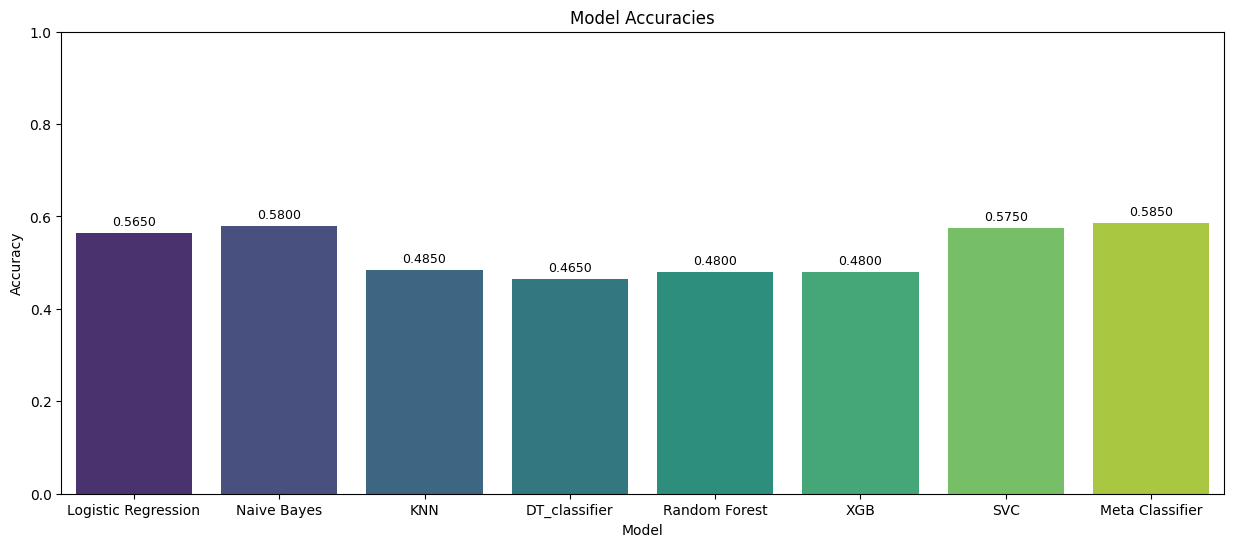

In [ ]:
models = ["Logistic Regression", "Naive Bayes","KNN","DT_classifier","Random Forest","XGB","SVC","Meta Classifier"]
accuracies = [test_accuracy_log_reg, test_accuracy_nbayes,test_accuracy_knn,test_accuracy_dt_classifier,test_accuracy_random_forest,test_accuracy_xgb,test_accuracy_svc,accuracy_meta]

# Create a bar plot using Seaborn
plt.figure(figsize=(15, 6))
sns.barplot(x=models, y=accuracies, hue=models, palette="viridis", legend=False)
plt.title("Model Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy

# Display numeric values on the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f"{accuracy:.4f}", ha="center", va="bottom", fontsize=9)

plt.show()

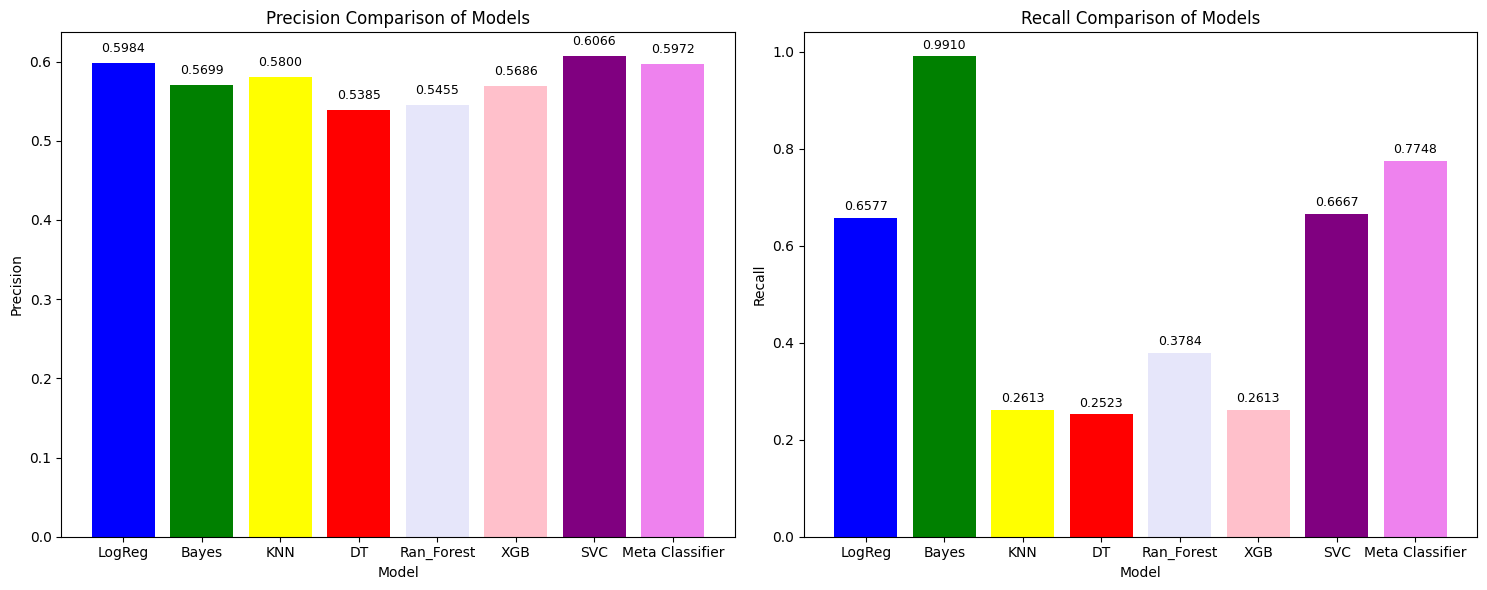

In [ ]:
# Calculate precision and recall for each model
precisions = [precision_score(Y_test,X_test_prediction_log_reg), precision_score(Y_test, X_test_prediction_nbayes),  precision_score(Y_test, X_test_prediction_knn),precision_score(Y_test, X_test_prediction_dt_classifier),precision_score(Y_test,X_test_prediction_random_forest),precision_score(Y_test,X_test_prediction_xgb),precision_score(Y_test,X_test_prediction_svc),precision_score(target, y_pred_meta)]
recalls = [recall_score(Y_test, X_test_prediction_log_reg), recall_score(Y_test, X_test_prediction_nbayes),  recall_score(Y_test, X_test_prediction_knn),recall_score(Y_test, X_test_prediction_dt_classifier),recall_score(Y_test,X_test_prediction_random_forest),recall_score(Y_test,X_test_prediction_xgb),recall_score(Y_test,X_test_prediction_svc),recall_score(target, y_pred_meta)]

# Define models
models = ["LogReg", "Bayes", "KNN","DT","Ran_Forest","XGB","SVC","Meta Classifier"]

# Plot the bar chart for precision
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.bar(models, precisions, color=["blue", "green", "yellow","red","lavender","pink","purple","violet"])
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Precision Comparison of Models')
for i, f1 in enumerate(precisions):
    plt.text(i, f1 + 0.01, f"{f1:.4f}", ha="center", va="bottom", fontsize=9)


# Plot the bar chart for recall
plt.subplot(1, 2, 2)
plt.bar(models, recalls, color=["blue", "green", "yellow","red","lavender","pink","purple","violet"])
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall Comparison of Models')
for i, f1 in enumerate(recalls):
    plt.text(i, f1 + 0.01, f"{f1:.4f}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()




In [ ]:
from sklearn.metrics import f1_score

# List of model names
models = ['Logistic Regression', 'Naive Bayes', 'K-Nearest Neighbors',
          'Decision Tree', 'Random Forest', 'XGBoost', 'SVC', 'Meta Classifier']

# Calculate F1-score for each model
f1_scores = [
    f1_score(Y_test, X_test_prediction_log_reg),
    f1_score(Y_test, X_test_prediction_nbayes),
    f1_score(Y_test, X_test_prediction_knn),
    f1_score(Y_test, X_test_prediction_dt_classifier),
    f1_score(Y_test, X_test_prediction_random_forest),
    f1_score(Y_test, X_test_prediction_xgb),
    f1_score(Y_test, X_test_prediction_svc),
    f1_score(Y_test, y_pred_meta)  # Use Y_test for consistency
]

# Print F1-scores for each model
for model, f1_score_value in zip(models, f1_scores):
    print(f"{model}: F1-score = {f1_score_value:.4f}")


Logistic Regression: F1-score = 0.6266
Naive Bayes: F1-score = 0.7237
K-Nearest Neighbors: F1-score = 0.3602
Decision Tree: F1-score = 0.3436
Random Forest: F1-score = 0.4468
XGBoost: F1-score = 0.3580
SVC: F1-score = 0.6352
Meta Classifier: F1-score = 0.6745


<ipython-input-521-507a7e2fc1f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=f1_scores, palette="viridis",legend=False)


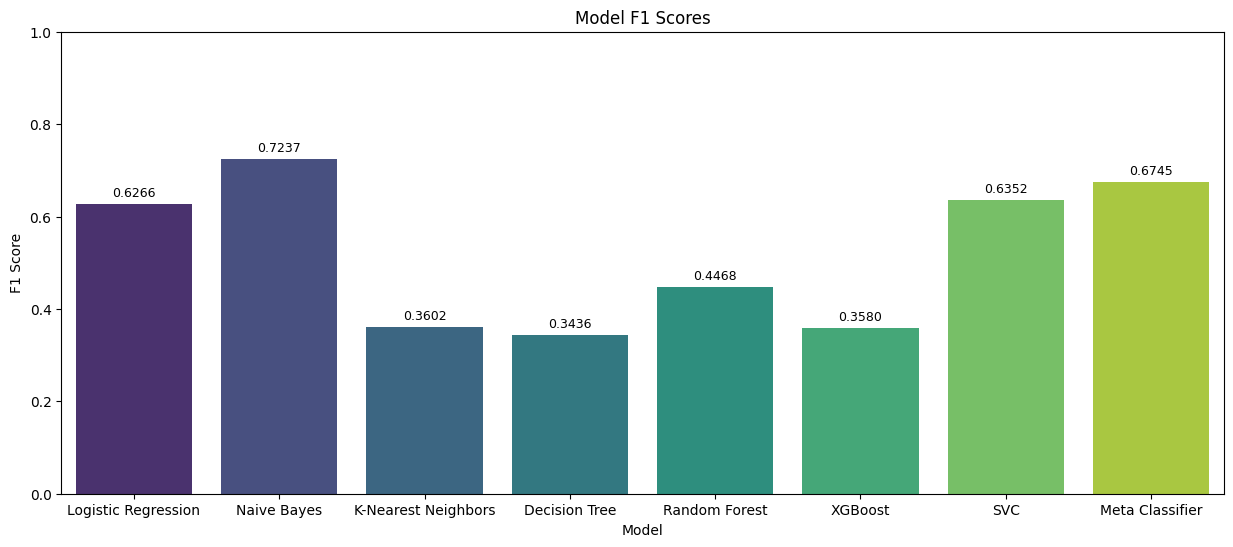

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(x=models, y=f1_scores, palette="viridis",legend=False)
plt.title("Model F1 Scores")
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for F1 score

# Display numeric values on the bars for F1 scores
for i, f1 in enumerate(f1_scores):
    plt.text(i, f1 + 0.01, f"{f1:.4f}", ha="center", va="bottom", fontsize=9)

plt.show()

In [ ]:
# import numpy as np
# import pandas as pd
# from lime.lime_tabular import LimeTabularExplainer
# from sklearn.preprocessing import LabelEncoder
#   # Replace with your actual model

# # Load your actual dataset (replace with your actual dataset file)
# data = pd.read_csv('/content/Dataset_1.csv')
# X = data.drop('Hair Loss', axis=1)  # Exclude the target column
# Y = data['Hair Loss']

# label_encoder = LabelEncoder()

# for col in X.select_dtypes(include=['object']).columns:
#     X[col] = label_encoder.fit_transform(X[col])
# # Train your model (assuming you have already trained it)
# model = nbayes  # Replace with your actual model
# # Enable probability estimates
# model.fit(X, Y)

# # Initialize LIME explainer
# explainer = LimeTabularExplainer(
#     training_data=X.values,
#     feature_names=X.columns,
#     class_names=['No Hair fall', 'Hair Fall'],  # Replace with your actual class names
#     mode='classification'  # Change to 'regression' if your task is regression
# )

# # Select an instance for explanation (replace with your actual instance)
# instance = X.iloc[0]

# # Generate explanation for the selected instance
# explanation = explainer.explain_instance(
#     data_row=instance.values,
#     predict_fn=model.predict_proba  # Use predict if your task is regression
# )

# # Visualize the explanation
# explanation.show_in_notebook(show_table=True)

In [ ]:
import numpy as np
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer
from sklearn.preprocessing import LabelEncoder
  # Replace with your actual model

# Load your actual dataset (replace with your actual dataset file)
data = pd.read_csv('/content/Dataset_1.csv')
X = data.drop('Hair Loss', axis=1)  # Exclude the target column
Y = data['Hair Loss']

label_encoder = LabelEncoder()

for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])
# Train your model (assuming you have already trained it)
model = nbayes # Replace with your actual model
model.fit(X, Y)

# Initialize LIME explainer
explainer = LimeTabularExplainer(
    training_data=X.values,
    feature_names=X.columns,
    class_names=['No Hair fall', 'Hair Fall'],  # Replace with your actual class names
    mode='classification'  # Change to 'regression' if your task is regression
)

# Select an instance for explanation (replace with your actual instance)
instance = X.iloc[0]

# Generate explanation for the selected instance
explanation = explainer.explain_instance(
    data_row=instance.values,
    predict_fn=model.predict_proba  # Use predict if your task is regression
)

# Visualize the explanation
explanation.show_in_notebook(show_table=True)

# threshold = 0.1  # Ignore LIME weights below this
# important_features_lime = [
#     (feature, weight) for feature, weight in explanation.as_list() if abs(weight) > threshold
# ]
# print("Selected Features (LIME):", important_features_lime)

In [ ]:

# Load your actual dataset (replace with your actual dataset file)
data = pd.read_csv('/content/Dataset_1.csv')
X = data.drop('Hair Loss', axis=1)  # Exclude the target column
Y = data['Hair Loss']

label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

# Train your model (assuming you have already trained it)
model = nbayes  # Replace with your actual model
model.fit(X, Y)

# Check the shapes of the data
print("Shape of X:", X.shape)

# Select an instance for explanation (replace with your actual instance)
instance = X.iloc[0].values.reshape(1, -1)
print("Shape of instance:", instance.shape)

# Initialize SHAP explainer
explainer = shap.TreeExplainer(model)

# Generate SHAP values for the selected instance
shap_values = explainer.shap_values(X)

# Visualize the SHAP values
#shap.initjs()
#shap.force_plot(explainer.expected_value, shap_values, instance)

# For a more comprehensive analysis, you can also visualize feature importance across the entire dataset
shap.summary_plot(shap_values, X)


Shape of X: (999, 12)
Shape of instance: (1, 12)


InvalidModelError: Model type not yet supported by TreeExplainer: <class 'sklearn.naive_bayes.GaussianNB'>